In [16]:
#importing lib
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [19]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [20]:
#check for duplicated rows
df.duplicated().sum()

np.int64(0)

In [21]:
#exploring summary statistics
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [22]:
#caste
df["Release_Date"] = pd.to_datetime(df["Release_Date"])
print(df)

     Release_Date                                 Title  \
0      2021-12-15               Spider-Man: No Way Home   
1      2022-03-01                            The Batman   
2      2022-02-25                               No Exit   
3      2021-11-24                               Encanto   
4      2021-12-22                        The King's Man   
...           ...                                   ...   
9822   1973-10-15                              Badlands   
9823   2020-10-01                      Violent Delights   
9824   2016-05-06                          The Offering   
9825   2021-03-31  The United States vs. Billie Holiday   
9826   1984-09-23                               Threads   

                                               Overview  Popularity  \
0     Peter Parker is unmasked and no longer able to...    5083.954   
1     In his second year of fighting crime, Batman u...    3827.658   
2     Stranded at a rest stop in the mountains durin...    2618.087   
3     T

In [23]:
#confirming changes
print(df['Release_Date'].dtypes)

datetime64[ns]


In [24]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Only_Date'] = df['Release_Date'].dt.date
df['Year'] = df ['Release_Date'].dt.year
df['Year'].dtypes
df['Only_Date'].dtypes

dtype('O')

In [25]:
# making list of column to be dropped
cols = ['Overview','Poster_Url']

In [26]:
#droping columns and confirming changes
df.drop(cols,axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Original_Language', 'Genre', 'Only_Date', 'Year'],
      dtype='object')

In [27]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Only_Date,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",2021-12-15,2021
1,2022-03-01,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller",2022-03-01,2022
2,2022-02-25,No Exit,2618.087,122,6.3,en,Thriller,2022-02-25,2022
3,2021-11-24,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",2021-11-24,2021
4,2021-12-22,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",2021-12-22,2021


In [28]:
def catigorize_col(df,col,labels):

    #setting the edges to cut the column accordingly
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']

    ]

    #cut the column into categories
    df [col] = pd.cut(df[col], bins=edges, labels =labels, duplicates='drop')

    return df




        

In [29]:
labels = ['not_popular','below_avg', 'average','popular']

In [30]:
df = catigorize_col(df, 'Vote_Average',labels)

In [31]:
print(df['Vote_Average'].unique())

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']


In [32]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Only_Date,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,en,"Action, Adventure, Science Fiction",2021-12-15,2021
1,2022-03-01,The Batman,3827.658,1151,popular,en,"Crime, Mystery, Thriller",2022-03-01,2022
2,2022-02-25,No Exit,2618.087,122,below_avg,en,Thriller,2022-02-25,2022
3,2021-11-24,Encanto,2402.201,5076,popular,en,"Animation, Comedy, Family, Fantasy",2021-11-24,2021
4,2021-12-22,The King's Man,1895.511,1793,average,en,"Action, Adventure, Thriller, War",2021-12-22,2021


In [33]:
#exploring column
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [34]:
# dropping NaNs
df.dropna(inplace = True)
#confirming
df.isna().sum()

Release_Date         0
Title                0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Only_Date            0
Year                 0
dtype: int64

In [35]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Only_Date,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,en,"Action, Adventure, Science Fiction",2021-12-15,2021
1,2022-03-01,The Batman,3827.658,1151,popular,en,"Crime, Mystery, Thriller",2022-03-01,2022
2,2022-02-25,No Exit,2618.087,122,below_avg,en,Thriller,2022-02-25,2022
3,2021-11-24,Encanto,2402.201,5076,popular,en,"Animation, Comedy, Family, Fantasy",2021-11-24,2021
4,2021-12-22,The King's Man,1895.511,1793,average,en,"Action, Adventure, Thriller, War",2021-12-22,2021


In [36]:
# we'd  split genre into a list and then
#explode our dataframe to have only one 
# genre per row for ezch movie

#split the stringn into lists
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Only_Date,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,en,Action,2021-12-15,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure,2021-12-15,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction,2021-12-15,2021
3,2022-03-01,The Batman,3827.658,1151,popular,en,Crime,2022-03-01,2022
4,2022-03-01,The Batman,3827.658,1151,popular,en,Mystery,2022-03-01,2022


In [37]:
#casting column into category
df['Genre'] = df['Genre'].astype('category')
#confirming changes
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       25552 non-null  datetime64[ns]
 1   Title              25552 non-null  object        
 2   Popularity         25552 non-null  float64       
 3   Vote_Count         25552 non-null  int64         
 4   Vote_Average       25552 non-null  category      
 5   Original_Language  25552 non-null  object        
 6   Genre              25552 non-null  category      
 7   Only_Date          25552 non-null  object        
 8   Year               25552 non-null  int32         
dtypes: category(2), datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 1.3+ MB


In [39]:
df.nunique()

Release_Date         5846
Title                9415
Popularity           8088
Vote_Count           3265
Vote_Average            4
Original_Language      42
Genre                  19
Only_Date            5846
Year                  100
dtype: int64

In [40]:
#------------ Data visualization-------
#setting  up seaborn configurations
sns.set_style('whitegrid')

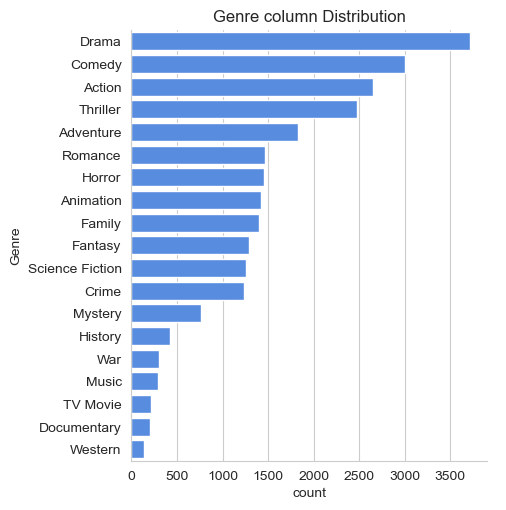

In [41]:
#visualizing the genre column distribution
sns.catplot(
    y ='Genre',
    data=df,
    kind='count',
    order=df['Genre'].value_counts().index,
    color='#4287f5'
)

plt.title('Genre column Distribution')
plt.show()

In [51]:
#q1: what is the most frequent genre in the dataset?
# showing starts.on genre column
df['Genre'].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: Genre, dtype: object

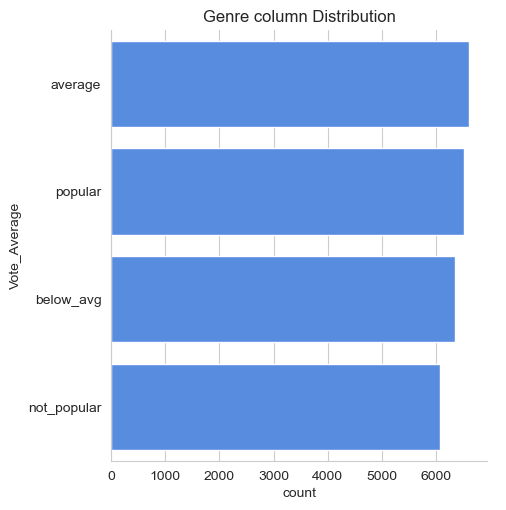

In [42]:
#2q. what generes has highest votes?
# visualizing the Vote_Average column distribution

sns.catplot(
    y ='Vote_Average',
    data=df,
    kind='count',
    order=df['Vote_Average'].value_counts().index,
    color='#4287f5'
)

plt.title('Genre column Distribution')
plt.show()

In [43]:
#4: what movie got the highest popularity ? whaat its genre?
#checking min popularity in dataset

df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Only_Date,Year
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,en,Action,2021-12-15,2021
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,en,Adventure,2021-12-15,2021
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,en,Science Fiction,2021-12-15,2021


In [44]:
#4: what movie got the lowest popularity ? whaat its genre?
#checking min popularity in dataset

df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Only_Date,Year
25546,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,en,Music,2021-03-31,2021
25547,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,en,Drama,2021-03-31,2021
25548,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,en,History,2021-03-31,2021
25549,1984-09-23,Threads,13.354,186,popular,en,War,1984-09-23,1984
25550,1984-09-23,Threads,13.354,186,popular,en,Drama,1984-09-23,1984
25551,1984-09-23,Threads,13.354,186,popular,en,Science Fiction,1984-09-23,1984


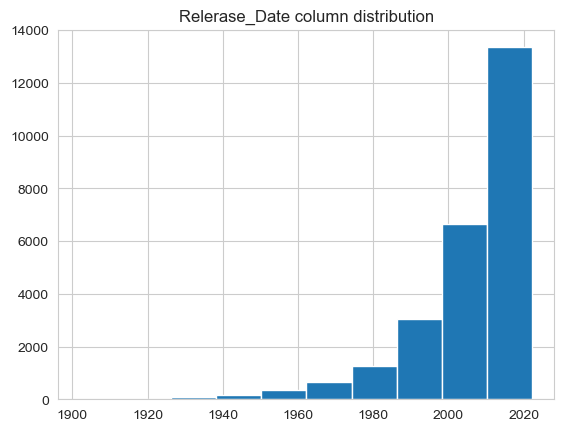

In [45]:
#5: which year has the most filmmed movies?
df['Release_Date'].hist()
plt.title('Relerase_Date column distribution')
plt.show()

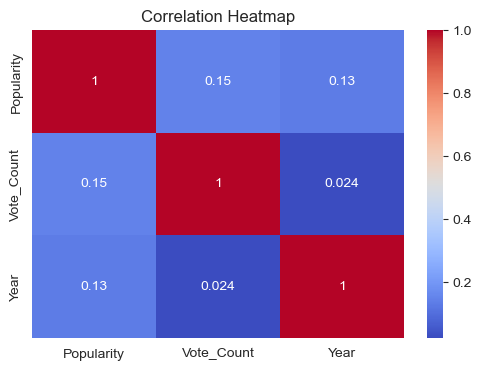

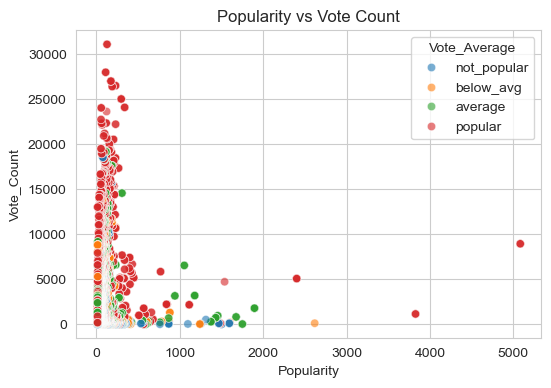

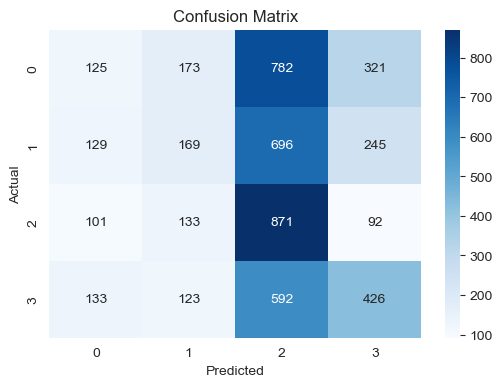

              precision    recall  f1-score   support

           0       0.26      0.09      0.13      1401
           1       0.28      0.14      0.18      1239
           2       0.30      0.73      0.42      1197
           3       0.39      0.33      0.36      1274

    accuracy                           0.31      5111
   macro avg       0.31      0.32      0.27      5111
weighted avg       0.31      0.31      0.27      5111



In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

le = LabelEncoder()
df['Vote_Average_Enc'] = le.fit_transform (df['Vote_Average'])


#======================================================================
#Feature selection
#========================================================================

x= df[['Popularity','Vote_Count']]
y=df['Vote_Average_Enc']

#========================================================================
#Train-Test split
#=======================================================================

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#=======================================================================
#Train ml model
model =LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
#=====================================================================
# predictions
#=====================================================================
y_pread = model.predict(x_test)

#===================================================================
#ml GRAPH:1 Correlation meatmap
#===================================================================
plt.figure(figsize = (6,4))
sns.heatmap(df[['Popularity','Vote_Count','Year']].corr(),annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
#===================================================================
#ml GRAPH2: Scatter plot
#===================================================================
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Popularity',
    y='Vote_Count',
    hue='Vote_Average',
    data=df,
    alpha=0.6
)
plt.title("Popularity vs Vote Count")
plt.show()
#==================================================================
#Classification matrix
#=================================================================
cm = confusion_matrix(y_test,y_pread)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
#==============================================================
#Classification Report
#==============================================================
print(classification_report(y_test,y_pread))

                                                